# Implémenter un modèle avec TensorFlow
## Objectif
* apprendre comment concevoir un modèle  de machine learning
* utiliser Tensorflow pour implémenter un modèle  linéaire de machine learning



## Modèle linéaire avec TensorFlow


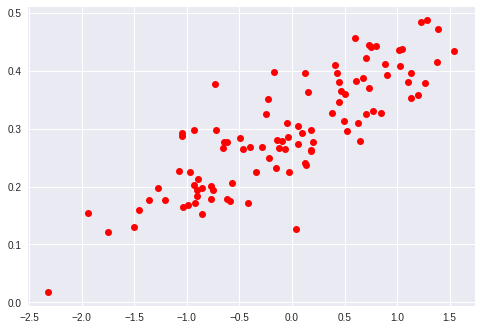

In [4]:
# modèle linéaire : un aperçu

import numpy as np
import matplotlib.pyplot as plt

num_pts = 100
list_pts = []
for i in xrange(num_pts):
  x1= np.random.normal(0.0, 0.9)
  y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.05)
  list_pts.append([x1, y1])

x_data = [v[0] for v in list_pts]
y_data = [v[1] for v in list_pts]

#Graphique
plt.plot(x_data, y_data, 'ro')
plt.legend()
plt.show()

In [0]:
import tensorflow as tf
# ========
#  CONCEPTION DU GRAPHE
# ========


W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

y = W * x_data + b

'''
Problème : trouve 'W' tel que la droite approxime le mieux possible le nuage de points

L'algorithme est le suivant : 
* on présente les données d'entrée (input : x_data)
* le modèle réalise une prédiction grâce à la relation linéaire : W * x_data + b
* comparaison de la prédiction avec la vraie valeur : y - y_data
*  calcul  de la fonction d'erreur ("loss")
C'est la moyenne du carré de l'erreur que l'on va faire décroitre.
On va rapprocher le plus possible chaque valeur prédite de la vraie valeur :
train = optimizer.minimize(loss)
* on modifie la valeur des inconnues (contenues dans 'W')
* on recommence 
'''

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [7]:
# ========
#  CALCUL DU GRAPHE
# ========


for step in xrange(101):
    sess.run(train)
    if step % 10 == 0:
        print(step, sess.run(W), sess.run(b))

(0, array([-0.10983232], dtype=float32), array([0.26483592], dtype=float32))
(10, array([0.09754845], dtype=float32), array([0.2988688], dtype=float32))
(20, array([0.09754987], dtype=float32), array([0.29886904], dtype=float32))
(30, array([0.09754987], dtype=float32), array([0.29886904], dtype=float32))
(40, array([0.09754987], dtype=float32), array([0.29886904], dtype=float32))
(50, array([0.09754987], dtype=float32), array([0.29886904], dtype=float32))
(60, array([0.09754987], dtype=float32), array([0.29886904], dtype=float32))
(70, array([0.09754987], dtype=float32), array([0.29886904], dtype=float32))
(80, array([0.09754987], dtype=float32), array([0.29886904], dtype=float32))
(90, array([0.09754987], dtype=float32), array([0.29886904], dtype=float32))
(100, array([0.09754987], dtype=float32), array([0.29886904], dtype=float32))


On trace la droite obtenue

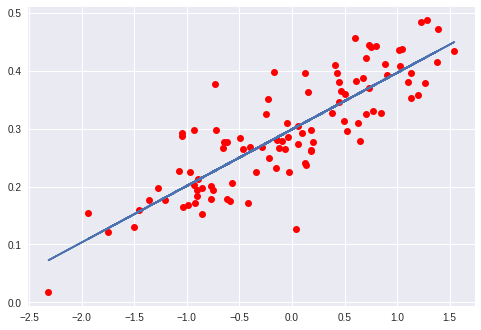

In [8]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.legend()
plt.show()